<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 140.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 162.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 153.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 135.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 148.6 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [7]:
## Write your code here

# Fill missing Employment and RemoteWork with "Unknown"
df['Employment'].fillna('Unknown', inplace=True)
df['RemoteWork'].fillna('Unknown', inplace=True)

# Drop rows where JobSat or YearsCodePro is missing (essential for analysis)
df = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

/tmp/ipykernel_300/2844776218.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna('Unknown', inplace=True)
/tmp/ipykernel_300/2844776218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Employment'].fillna('Unknown', inplace=True)
/tmp/ipykernel_300/2844776218.py:5: FutureWarning: A value is trying to be set on a

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


ExperienceRange
0-5 years      7.0
5-10 years     7.0
10-20 years    7.0
20+ years      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_300/3429901660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_300/3429901660.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobSat'] = df['JobSat'].astype('category').cat.codes
/tmp/ipykernel_300/3429901660.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavio

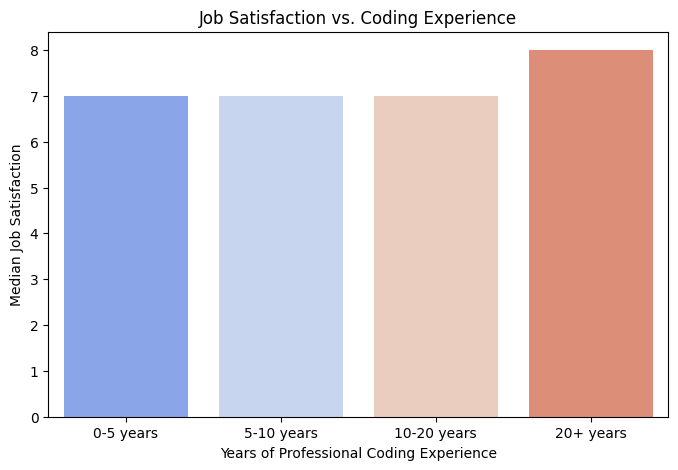

In [6]:
## Write your code here

# Define experience ranges
bins = [0, 5, 10, 20, float('inf')]  # Categories: 0-5, 5-10, 10-20, 20+
labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']

# Categorize experience
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Convert JobSat to numeric scores (if categorical)
df['JobSat'] = df['JobSat'].astype('category').cat.codes

# Group by experience range and calculate median job satisfaction
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()
print(median_satisfaction)

# Plot median job satisfaction per experience range
plt.figure(figsize=(8, 5))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='coolwarm')

plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median Job Satisfaction")
plt.title("Job Satisfaction vs. Coding Experience")
plt.show()

Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_300/401194471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='coolwarm')


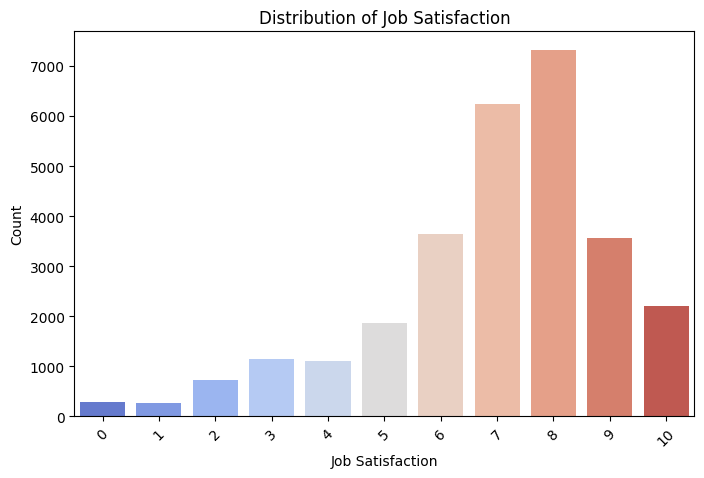

In [8]:
## Write your code here

# Count plot to show the distribution of JobSat values
plt.figure(figsize=(8, 5))  # Set figure size
sns.countplot(x='JobSat', data=df, palette='coolwarm')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_300/1049182425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='coolwarm')


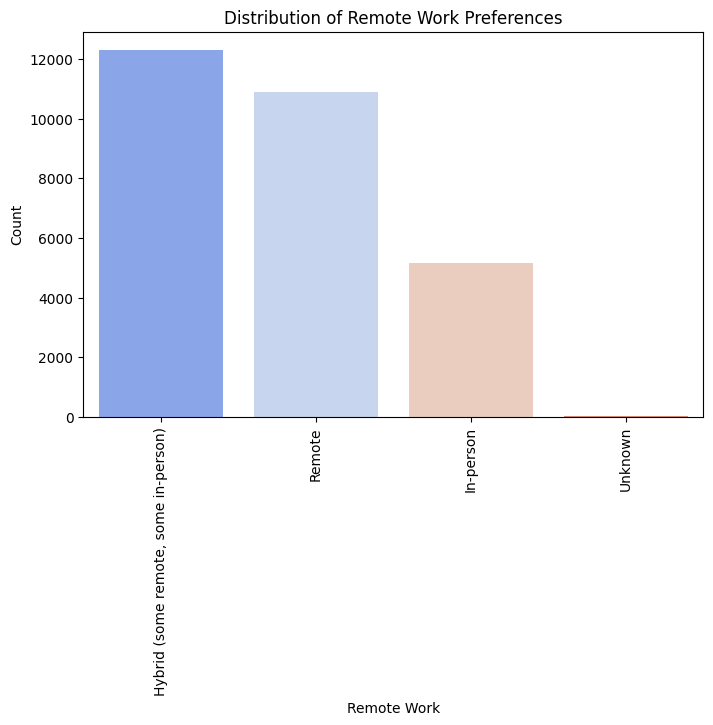

Cross-tabulation of Remote Work preferences by Employment and JobRole:
RemoteWork                                                            Hybrid (some remote, some in-person)  \
Employment                             DevType                                                               
Employed, full-time                    Academic researcher                                             156   
                                       Blockchain                                                        9   
                                       Cloud infrastructure engineer                                   116   
                                       Data engineer                                                   270   
                                       Data or business analyst                                         87   
...                                                                                                    ...   
Student, part-time;Employed, part-time Scientist 

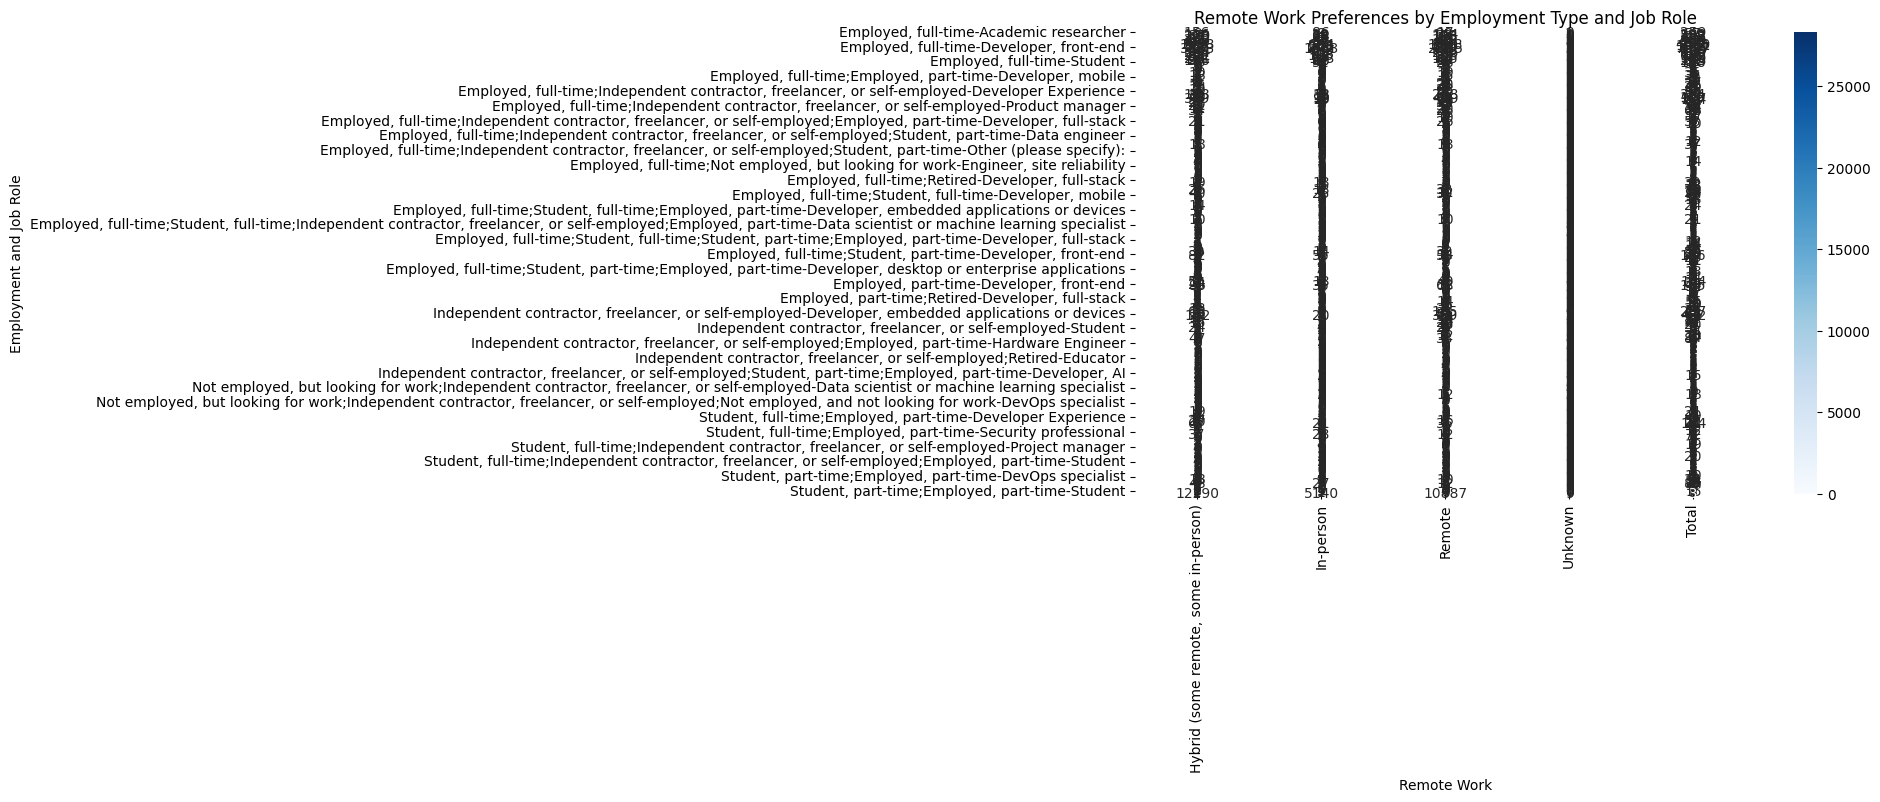

In [12]:
## Write your code here

# Count plot to show the distribution of RemoteWork preferences
plt.figure(figsize=(8, 5))
sns.countplot(x='RemoteWork', data=df, palette='coolwarm')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Cross-tabulate remote work preferences by Employment and JobRole
cross_tab = pd.crosstab([df['Employment'], df['DevType']], df['RemoteWork'], margins=True, margins_name="Total")
print("Cross-tabulation of Remote Work preferences by Employment and JobRole:")
print(cross_tab)

# Visualizing the cross-tabulation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Remote Work Preferences by Employment Type and Job Role')
plt.xlabel('Remote Work')
plt.ylabel('Employment and Job Role')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


12       United States of America
15                    Switzerland
18                        Germany
20                        Germany
22                        Ireland
                   ...           
65178                      Israel
65241    United States of America
65265                       India
65351                       Benin
65412                       Italy
Name: Country, Length: 28356, dtype: object


<Figure size 1800x800 with 0 Axes>

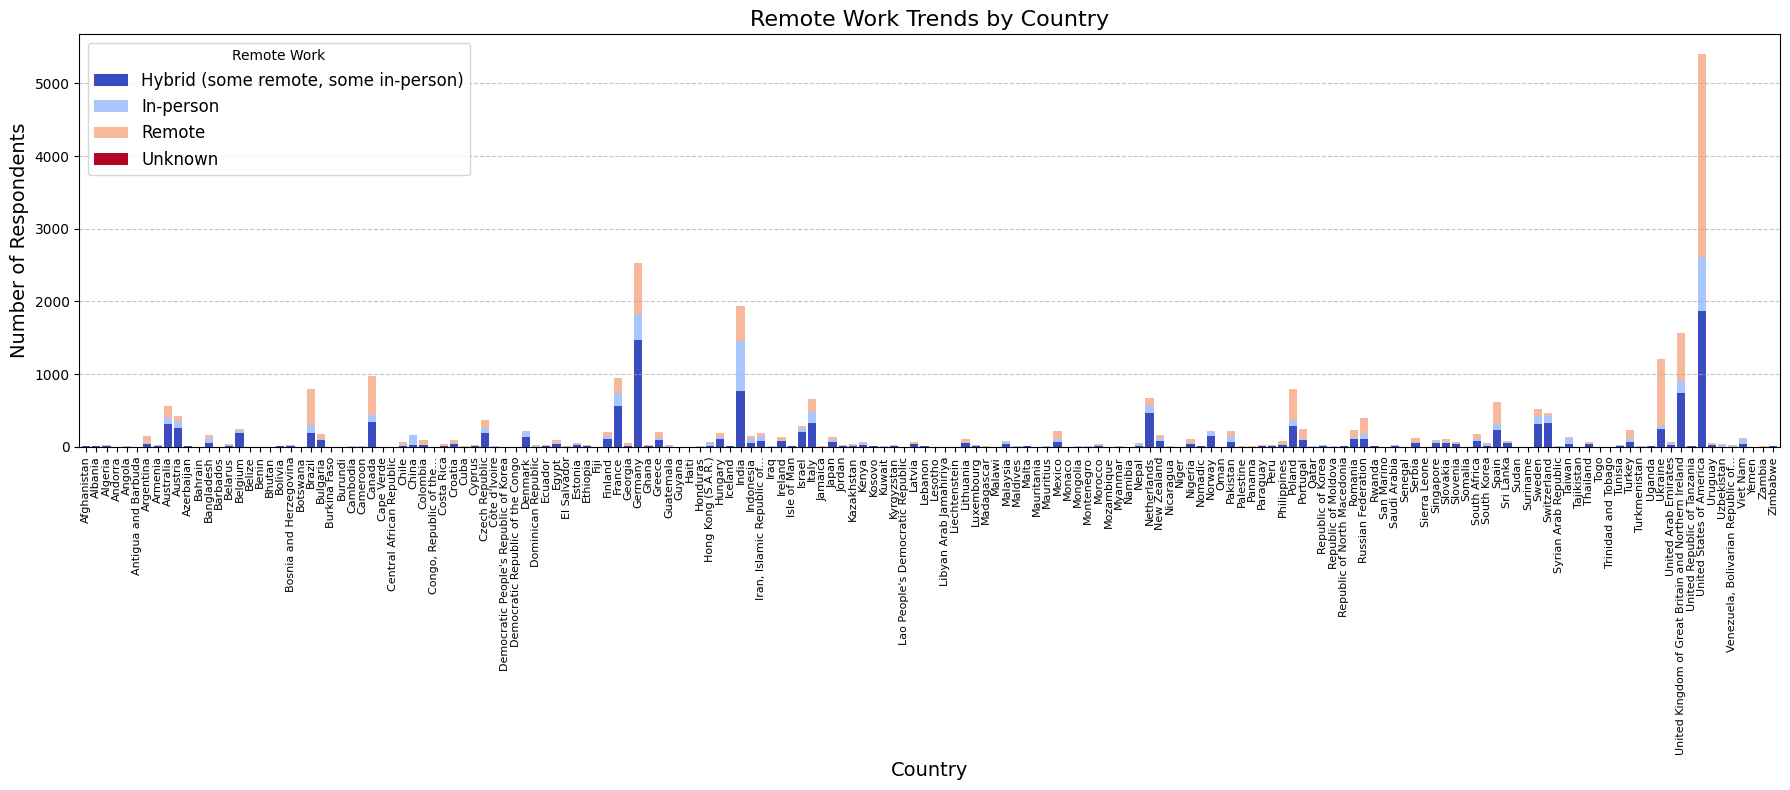

In [16]:
## Write your code here

print(df['Country'])

# Group the data and count occurrences of RemoteWork by Country
remote_work_counts = df.groupby(['Country', 'RemoteWork']).size().unstack()

# Fill NaN values with 0 to ensure numeric data for plotting
remote_work_counts = remote_work_counts.fillna(0)

# Increase figure size to fit all countries
plt.figure(figsize=(18, 8))

# Plot the grouped bar chart
remote_work_counts.plot(kind='bar', stacked=True, colormap='coolwarm', width=0.8, figsize=(18, 8))

# Formatting the plot
plt.title('Remote Work Trends by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate country labels for readability
plt.legend(title='Remote Work', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


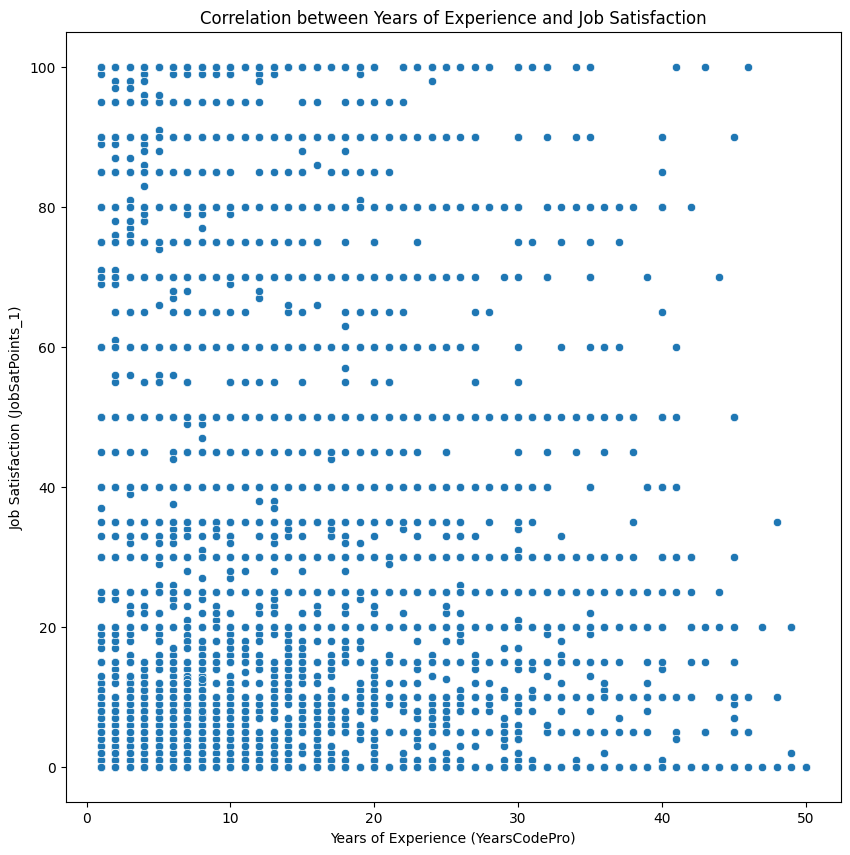

In [22]:
## Write your code here

# Create a scatter plot to examine the correlation between 'YearsCodePro' and 'JobSatPoints_1'
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1')

# Add labels and title
plt.xlabel('Years of Experience (YearsCodePro)')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.title('Correlation between Years of Experience and Job Satisfaction')

# Display the plot
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                 655   
Employed, full-time;Employed, part-time                                               6   
Employed, full-time;Independent contractor, fre...                                   72   
Employed, full-time;Independent contractor, fre...                                    7   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Independent contractor, free...                                    0   
Student, full-time;Not employed, but looking fo...                                    0   
Student, full-time;Not employed, but looking fo...                                    0   

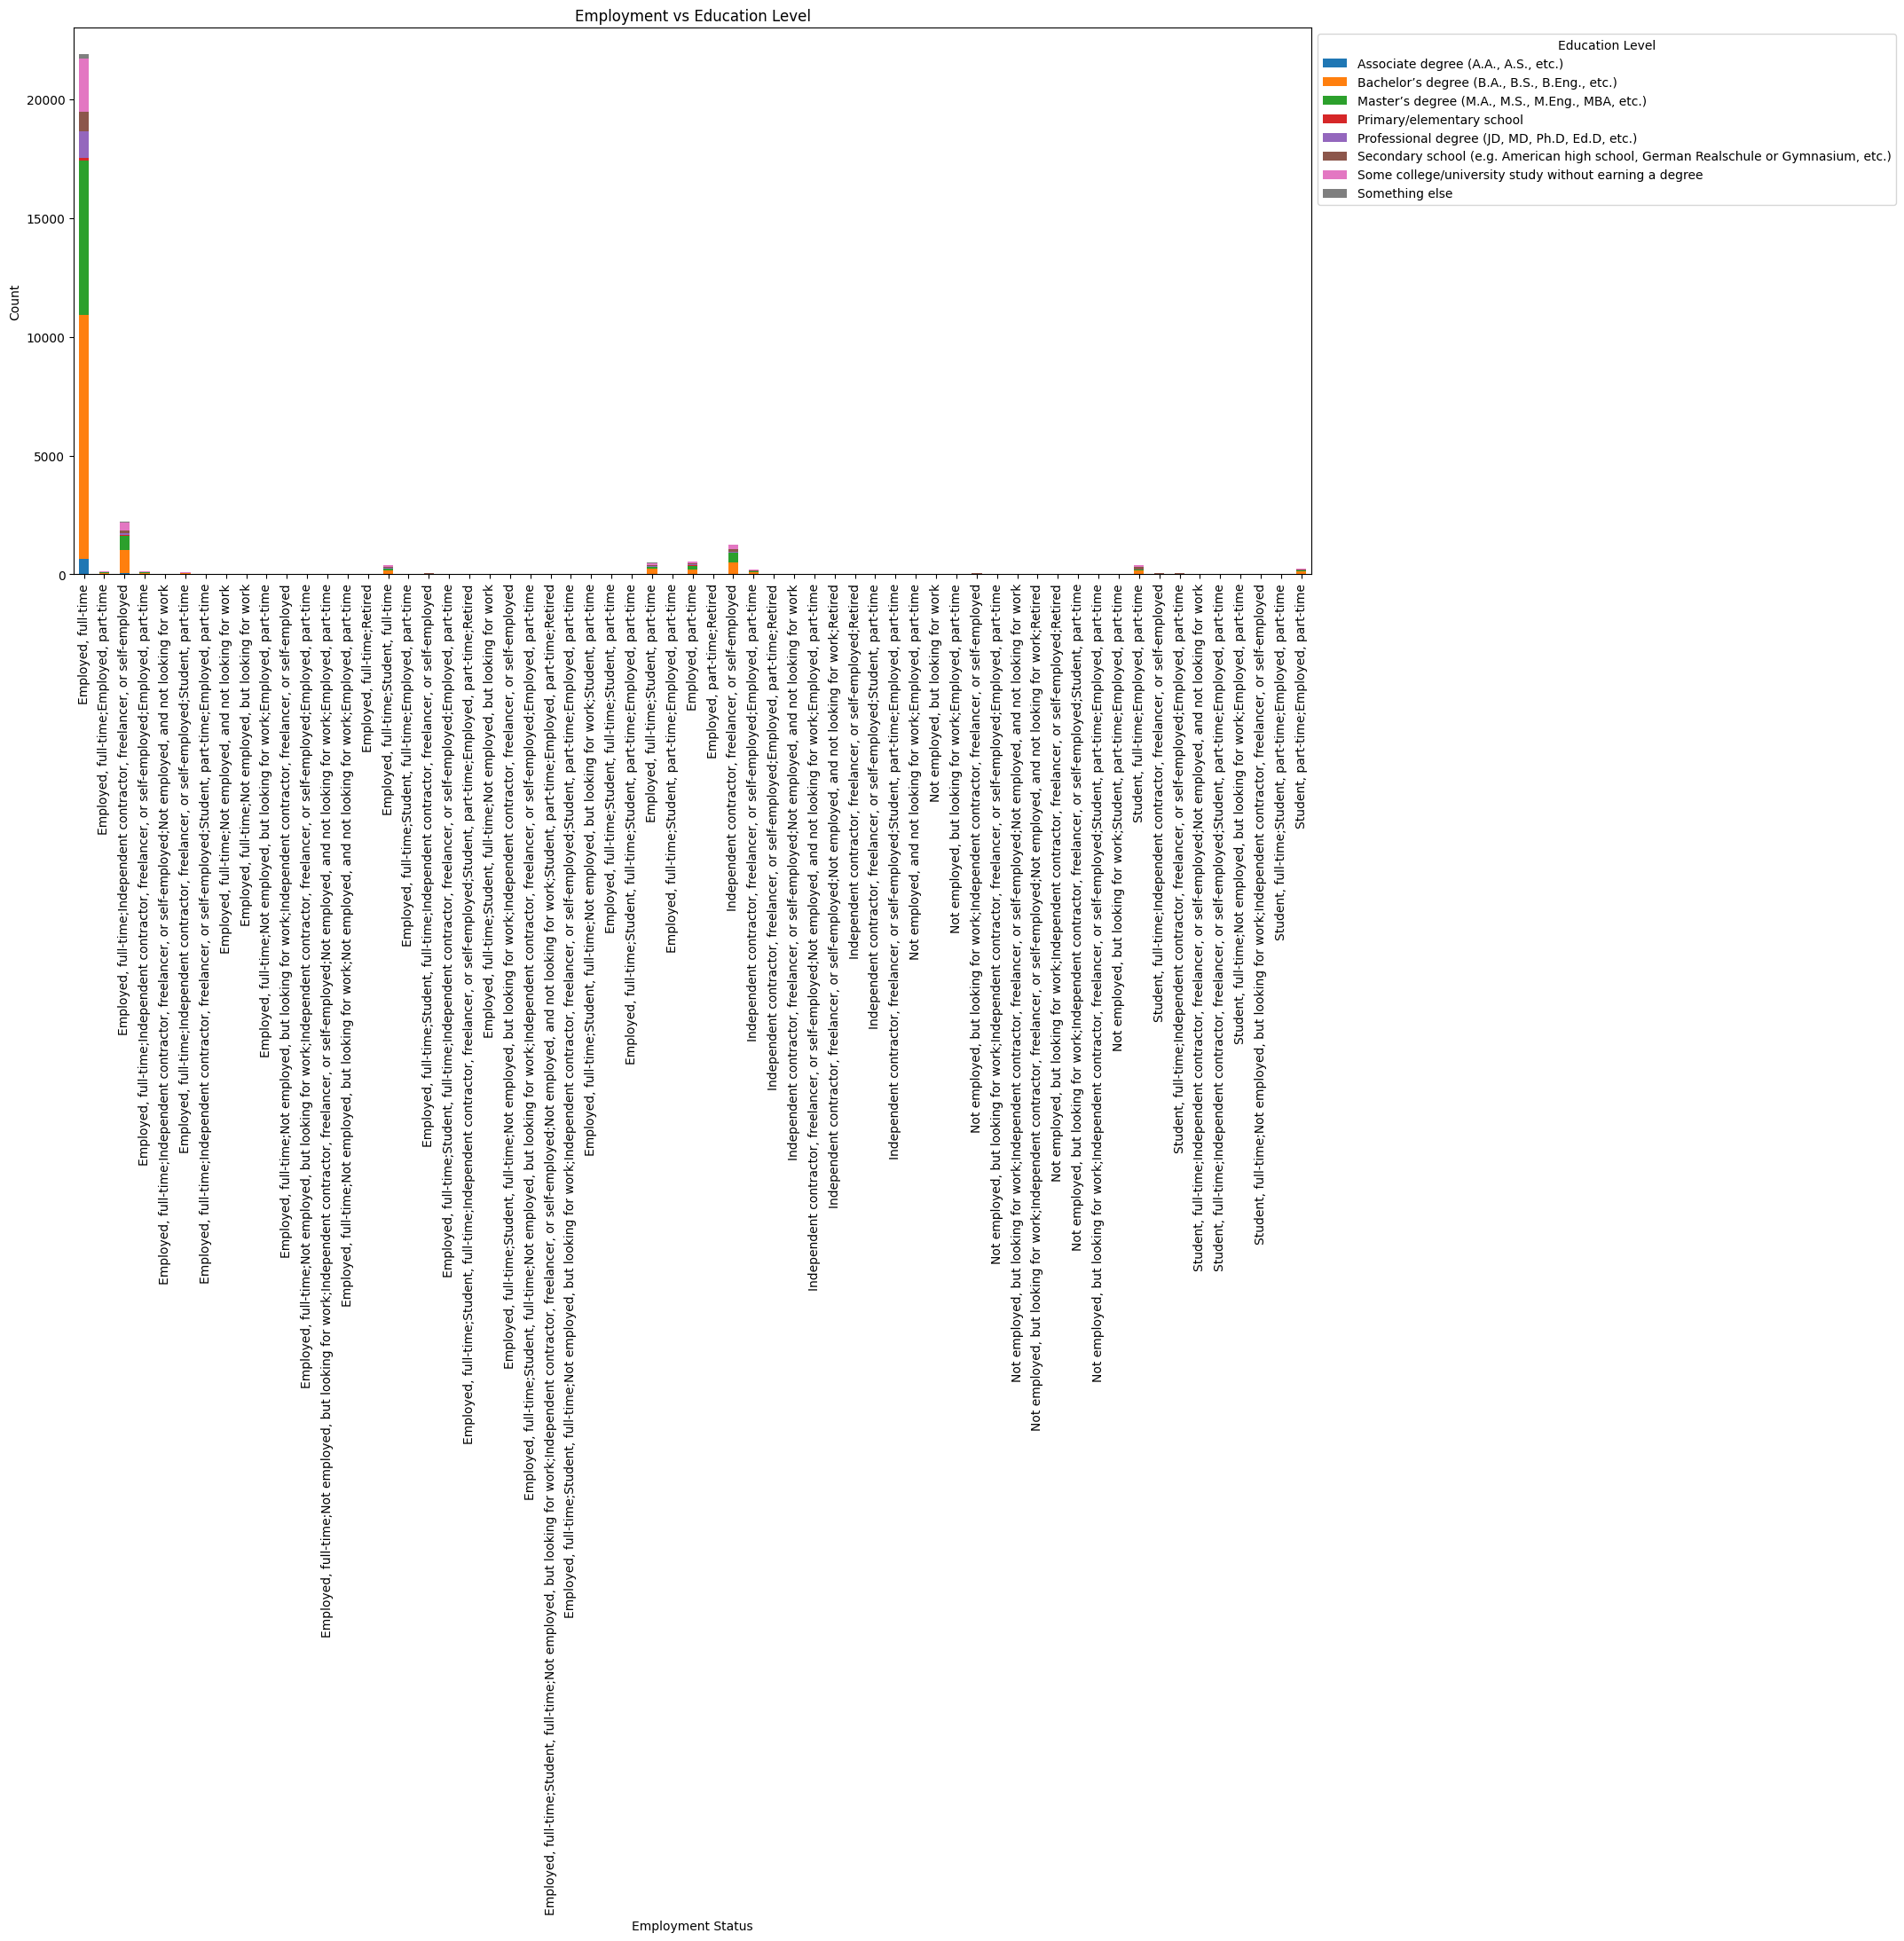

In [32]:
## Write your code here

# Create cross-tabulation between Employment and Education Level
employment_education_crosstab = pd.crosstab(df['Employment'], df['EdLevel'])
print(employment_education_crosstab)

# Plot a stacked bar chart
employment_education_crosstab.plot(kind='bar', stacked=True, figsize=(18, 8))

# Customize plot
plt.title('Employment vs Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Education Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [34]:
## Write your code here

# Save the modified dataset to a new CSV file
df.to_csv('modified_dataset.csv', index=False)

print("Data was saved succefully")

Data was saved succefully


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
